In [1]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# CO2(이산화 탄소),EMP(기온) 시각화

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mini project/co2_data.csv')
df

,date,co2
0,199901,373.7
1,199902,374.0
2,199903,372.9
3,199904,373.6
4,199905,370.8
...,...,...
247,201908,409.0
248,201909,411.9
249,201910,417.8
250,201911,419.9


In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mini project/temp 1999_2022.csv')
df1

,date,temp
0,1999-01,0.0
1,1999-02,1.4
2,1999-03,6.2
3,1999-04,12.5
4,1999-05,16.8
...,...,...
247,2019-08,26.0
248,2019-09,21.5
249,2019-10,15.5
250,2019-11,8.4


In [4]:
date = df1['date'].to_numpy()
temp = df1['temp'].to_numpy()
co2 = df['co2'].to_numpy()

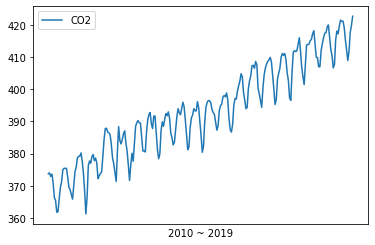

In [5]:
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
plt.plot(date, co2, label='CO2')
plt.xlabel('2010 ~ 2019')
plt.legend()
plt.show()

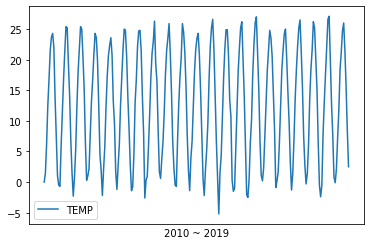

In [6]:
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
plt.plot(date, temp, label='TEMP')
plt.xlabel('2010 ~ 2019')
plt.legend()
plt.show()

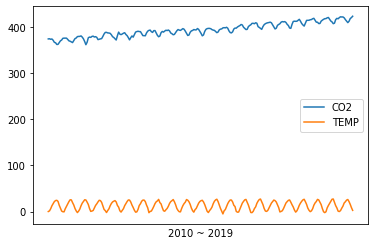

In [7]:
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
plt.plot(date, co2, label='CO2')
plt.plot(date, temp, label='TEMP')
plt.xlabel('2010 ~ 2019')
plt.legend()
plt.show()

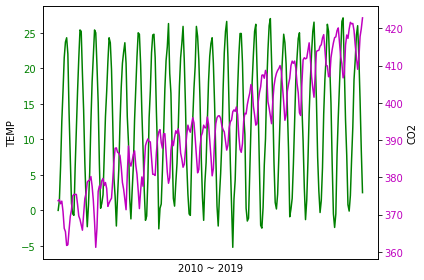

In [8]:
fig, ax1 = plt.subplots()
ax1.axes.xaxis.set_ticks([])
ax1.set_xlabel('2010 ~ 2019')
ax1.set_ylabel('TEMP')
ax1.plot(date, temp, label='TEMP', color='g')
ax1.tick_params(axis='y', labelcolor='g')
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
ax2.axes.xaxis.set_ticks([])
color_2 = 'tab:magenta'
ax2.set_ylabel('CO2')
ax2.plot(date, co2, label='CO2', color='m')
ax2.tick_params(axis='y', labelcolor='m')
plt.xlabel('2010 ~ 2019')

fig.tight_layout()
plt.show()

# RNN LSTM

In [9]:
from tensorflow import keras

In [10]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i) # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [11]:
TRAIN_SPLIT = 200

In [12]:
uni_data = df1['temp']
uni_data.index = df1['date']
uni_data.head()

date
1999-01     0.0
1999-02     1.4
1999-03     6.2
1999-04    12.5
1999-05    16.8
Name: temp, dtype: float64

In [13]:
uni_data = uni_data.values

In [14]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [15]:
univariate_past_history = 20
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT, univariate_past_history, univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None, univariate_past_history, univariate_future_target)

In [16]:
print('Single window of past history')
print(x_train_uni[0])
print('\n Target temperature to predict')
print(y_train_uni[0])

Single window of past history
[[-1.36490222]
 [-1.21247825]
 [-0.68988178]
 [-0.00397391]
 [ 0.46418543]
 [ 0.97589447]
 [ 1.21541785]
 [ 1.28074241]
 [ 1.0303316 ]
 [ 0.12667521]
 [-0.54834523]
 [-1.25602795]
 [-1.41933935]
 [-1.4411142 ]
 [-0.71165663]
 [-0.13462303]
 [ 0.46418543]
 [ 0.96500704]
 [ 1.4005041 ]
 [ 1.37872925]]

 Target temperature to predict
0.736371087246395


In [17]:
def create_time_steps(length):
  return list(range(-length, 0))

In [18]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

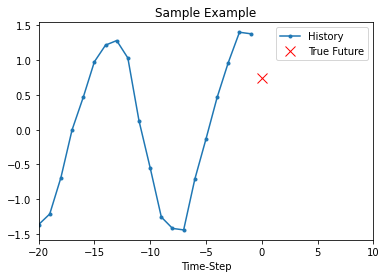

In [19]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

In [20]:
def baseline(history):
  return np.mean(history)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

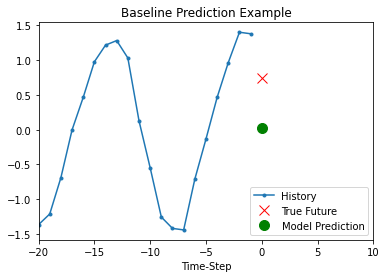

In [21]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0, 'Baseline Prediction Example')

In [22]:
import tensorflow as tf
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [23]:
simple_lstm_model = tf.keras.models.Sequential([
      # x_train_uni.shape = (299980, 20, 1)
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')
#모델의 출력을 확인하기 위해 샘플 예측을 만들어 봅니다
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

(32, 1)


In [24]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Epoch 1/10
200/200 [==============================] - 10s 27ms/step - loss: 0.5345 - val_loss: 0.1981
Epoch 2/10
200/200 [==============================] - 4s 20ms/step - loss: 0.1127 - val_loss: 0.1403
Epoch 3/10
200/200 [==============================] - 4s 19ms/step - loss: 0.1010 - val_loss: 0.1240
Epoch 4/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0976 - val_loss: 0.1195
Epoch 5/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0958 - val_loss: 0.1144
Epoch 6/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0943 - val_loss: 0.1111
Epoch 7/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0922 - val_loss: 0.1069
Epoch 8/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0880 - val_loss: 0.1054
Epoch 9/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0857 - val_loss: 0.1041
Epoch 10/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0845 - val_l

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


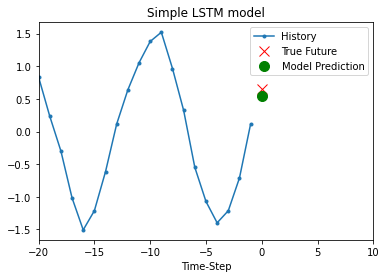

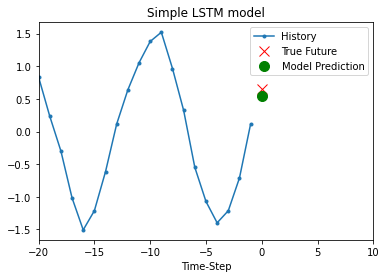

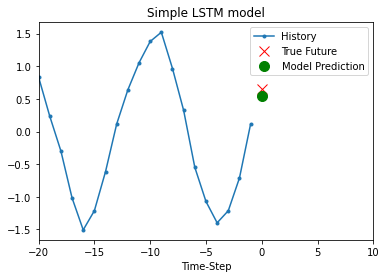

In [26]:
for x, y in val_univariate.take(3):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()

In [27]:
date_co2_temp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mini project/co2temp_data.csv')

In [28]:
#특성들 목록에 추가

features = date_co2_temp[['co2','temp']]
features.index = date_co2_temp['date']
features.head()

,co2,temp
date,,
1999-01-01,373.7,0.1
1999-02-01,374.0,1.4
1999-03-01,372.9,6.2
1999-04-01,373.6,12.5
1999-05-01,370.8,16.8


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fab5a708f90>,
      dtype=object)

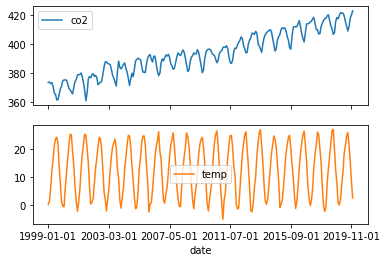

In [29]:
features.plot(subplots=True)

In [30]:
#dataset 표준화
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

In [31]:
#single step model
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [32]:
past_history = 40
future_target = 10
STEP = 1

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [33]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (40, 2)


In [34]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [35]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [36]:
#샘플예측 확인
for x, y in val_data_single.take(1):
  print(single_step_model.predict(x).shape)

(2, 1)


In [37]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Epoch 1/10
200/200 [==============================] - 9s 33ms/step - loss: 10.8063 - val_loss: 2.9318
Epoch 2/10
200/200 [==============================] - 6s 30ms/step - loss: 9.5716 - val_loss: 2.9437
Epoch 3/10
200/200 [==============================] - 6s 31ms/step - loss: 8.6573 - val_loss: 2.9498
Epoch 4/10
200/200 [==============================] - 6s 30ms/step - loss: 8.0086 - val_loss: 4.4700
Epoch 5/10
200/200 [==============================] - 6s 30ms/step - loss: 7.5917 - val_loss: 6.2933
Epoch 6/10
200/200 [==============================] - 6s 30ms/step - loss: 7.4120 - val_loss: 7.2824
Epoch 7/10
200/200 [==============================] - 6s 31ms/step - loss: 7.2934 - val_loss: 7.2818
Epoch 8/10
200/200 [==============================] - 6s 30ms/step - loss: 7.1723 - val_loss: 7.2795
Epoch 9/10
200/200 [==============================] - 6s 30ms/step - loss: 7.0441 - val_loss: 7.2877
Epoch 10/10
200/200 [==============================] - 6s 31ms/step - loss: 6.9036 - val_l

In [38]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

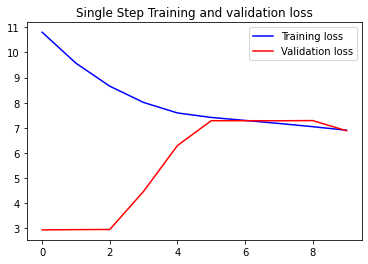

In [39]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

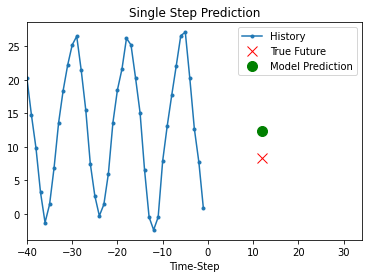

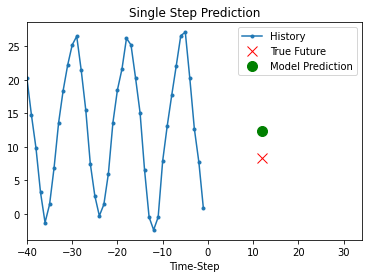

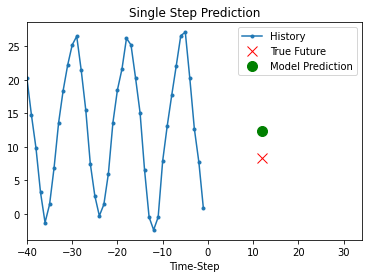

In [40]:
for x, y in val_data_single.take(3):
  plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Single Step Prediction')
  plot.show()

In [41]:
future_target = 10
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

In [42]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target temperature to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (40, 2)

 Target temperature to predict : (10,)


In [43]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [44]:
#샘플 데이터 플로팅
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

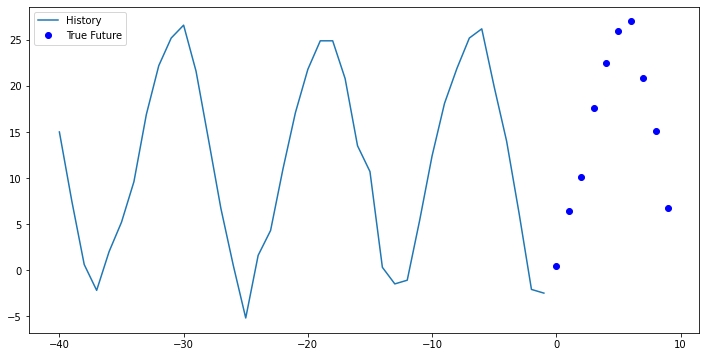

In [45]:
for x, y in train_data_multi.take(1):
  multi_step_plot(x[0], y[0], np.array([0]))

In [46]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(10))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [47]:
for x, y in val_data_multi.take(1):
  print (multi_step_model.predict(x).shape)

(2, 10)


In [48]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Epoch 1/10
200/200 [==============================] - 16s 62ms/step - loss: 9.2887 - val_loss: 5.8642
Epoch 2/10
200/200 [==============================] - 11s 55ms/step - loss: 7.7994 - val_loss: 6.2775
Epoch 3/10
200/200 [==============================] - 11s 54ms/step - loss: 7.9669 - val_loss: 6.1488
Epoch 4/10
200/200 [==============================] - 11s 55ms/step - loss: 8.2672 - val_loss: 7.6589
Epoch 5/10
200/200 [==============================] - 11s 54ms/step - loss: 7.2371 - val_loss: 16.0295
Epoch 6/10
200/200 [==============================] - 11s 54ms/step - loss: 8.1893 - val_loss: 5.9602
Epoch 7/10
200/200 [==============================] - 11s 55ms/step - loss: 8.6216 - val_loss: 8.1770
Epoch 8/10
200/200 [==============================] - 11s 55ms/step - loss: 7.2263 - val_loss: 5.6002
Epoch 9/10
200/200 [==============================] - 11s 54ms/step - loss: 7.6524 - val_loss: 6.4910
Epoch 10/10
200/200 [==============================] - 11s 54ms/step - loss: 6.09

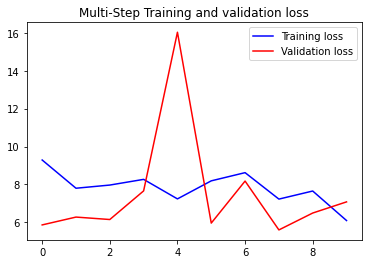

In [49]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

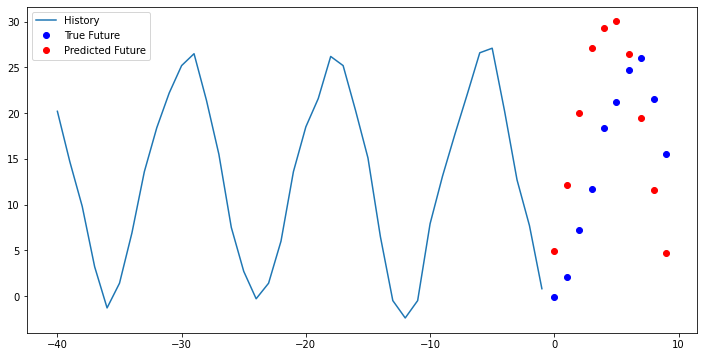

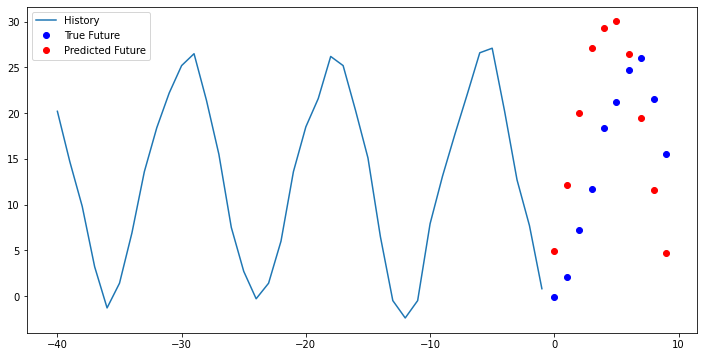

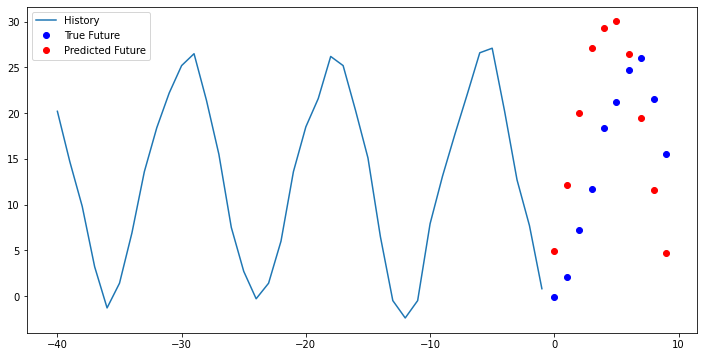

In [50]:
for x, y in val_data_multi.take(3):
  multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])

# PH(산성도), SO2(이황산 가스), NO2(이산화 질소) 시각화

In [51]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mini project/NO2.csv')
df2

,date,NO2
0,2010-01,0.032
1,2010-02,0.028
2,2010-03,0.024
3,2010-04,0.026
4,2010-05,0.024
...,...,...
115,2019-08,0.013
116,2019-09,0.015
117,2019-10,0.019
118,2019-11,0.026


In [52]:
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mini project/SO2.csv')
df3

,date,SO2
0,2010-01,0.007750
1,2010-02,0.006000
2,2010-03,0.004750
3,2010-04,0.005125
4,2010-05,0.005500
...,...,...
115,2019-08,0.003625
116,2019-09,0.003250
117,2019-10,0.003125
118,2019-11,0.003625


In [53]:
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mini project/PH 2010_2019.csv')
df4

,date,PH
0,2010-01,4.50
1,2010-02,4.78
2,2010-03,5.34
3,2010-04,5.23
4,2010-05,4.82
...,...,...
115,2019-08,5.20
116,2019-09,5.42
117,2019-10,5.40
118,2019-11,5.01


In [54]:
date2 = df2['date'].to_numpy()
no2 = df2['NO2'].to_numpy()
so2 = df3['SO2'].to_numpy()
ph = df4['PH'].to_numpy()

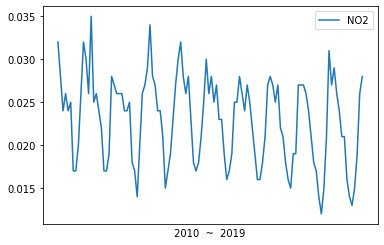

In [55]:
ax = plt.gca()
ax.axes.xaxis.set_ticks([])

plt.plot(date2, no2, label='NO2')
plt.xlabel('2010  ~  2019')

plt.legend()
plt.show()

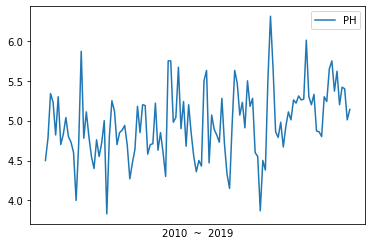

In [56]:
ax = plt.gca()
ax.axes.xaxis.set_ticks([])

plt.plot(date2, ph, label='PH')
plt.xlabel('2010  ~  2019')

plt.legend()
plt.show()

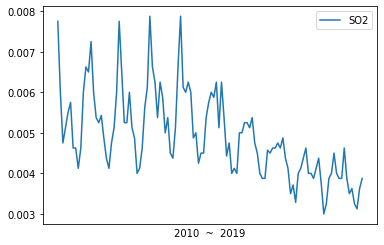

In [57]:
ax = plt.gca()
ax.axes.xaxis.set_ticks([])

plt.plot(date2, so2, label='SO2')
plt.xlabel('2010  ~  2019')

plt.legend()
plt.show()

In [58]:
df6 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mini project/PH,NO2,SO2.csv')

In [59]:
features = df6[['NO2','SO2','PH']]
features.index = df6['date']
features.head()

,NO2,SO2,PH
date,,,
2010-01-01,0.032,0.007750,4.50
2010-02-01,0.028,0.006000,4.78
2010-03-01,0.024,0.004750,5.34
2010-04-01,0.026,0.005125,5.23
2010-05-01,0.024,0.005500,4.82


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fab56b95090>,
      dtype=object)

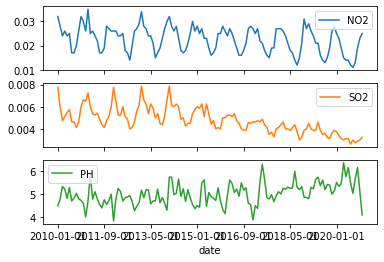

In [60]:
features.plot(subplots=True)

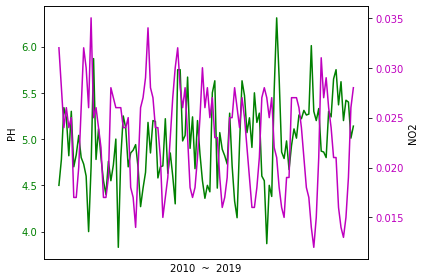

In [61]:
fig, ax1 = plt.subplots()
ax1.axes.xaxis.set_ticks([])
ax1.set_xlabel('2010  ~  2019')
ax1.set_ylabel('PH')
ax1.plot(date2, ph, label='PH', color='g')
ax1.tick_params(axis='y', labelcolor='g')
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
ax2.axes.xaxis.set_ticks([])
color_2 = 'tab:magenta'
ax2.set_ylabel('NO2')
ax2.plot(date2, no2, label='NO2', color='m')
ax2.tick_params(axis='y', labelcolor='m')

fig.tight_layout()
plt.show()

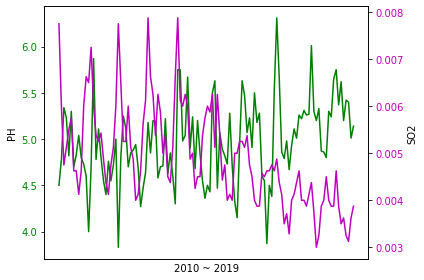

In [62]:
fig, ax1 = plt.subplots()
ax1.axes.xaxis.set_ticks([])
ax1.set_xlabel('2010 ~ 2019')
ax1.set_ylabel('PH')
ax1.plot(date2, ph, label='PH', color='g')
ax1.tick_params(axis='y', labelcolor='g')
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
ax2.axes.xaxis.set_ticks([])
color_2 = 'tab:magenta'
ax2.set_ylabel('SO2')
ax2.plot(date2, so2, label='SO2', color='m')
ax2.tick_params(axis='y', labelcolor='m')

fig.tight_layout()
plt.show()

# PM10(미세먼지 시각화)

In [63]:
df5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mini project/PM10.csv')
df5

,date,PM10
0,2010-01,52.875
1,2010-02,46.000
2,2010-03,62.750
3,2010-04,47.750
4,2010-05,57.000
...,...,...
115,2019-08,28.125
116,2019-09,24.375
117,2019-10,30.375
118,2019-11,39.750


In [64]:
date3 = df5['date'].to_numpy()
pm10 = df5['PM10'].to_numpy()

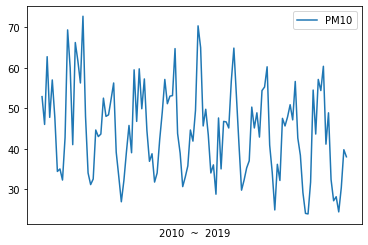

In [65]:
ax = plt.gca()
ax.axes.xaxis.set_ticks([])

plt.plot(date3, pm10, label='PM10')
plt.xlabel('2010  ~  2019')

plt.legend()
plt.show()